<a href="https://colab.research.google.com/github/lisahligono/cubo_test/blob/main/cubo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cubo

In [ ]:
import cubo
import xarray as xr
import numpy as np  

minicube = cubo.create(
    lat=0.632151988493385,
    lon=36.056791178028564,              # Lake Baringo, Kenya
    collection="sentinel-2-l2a",
    bands=["B8A","B11","B12"],           #Bands with 20m resolution
    start_date="2020-01-01",
    end_date="2021-01-01",
    edge_size=64,
    resolution=10,
    query={"eo:cloud_cover": {"lt": 40}}
)
minicube

,Array,Chunk
Bytes,4.59 MiB,32.00 kiB
Shape,"(49, 3, 64, 64)","(1, 1, 64, 64)"
Count,441 Tasks,147 Chunks
Type,float64,numpy.ndarray


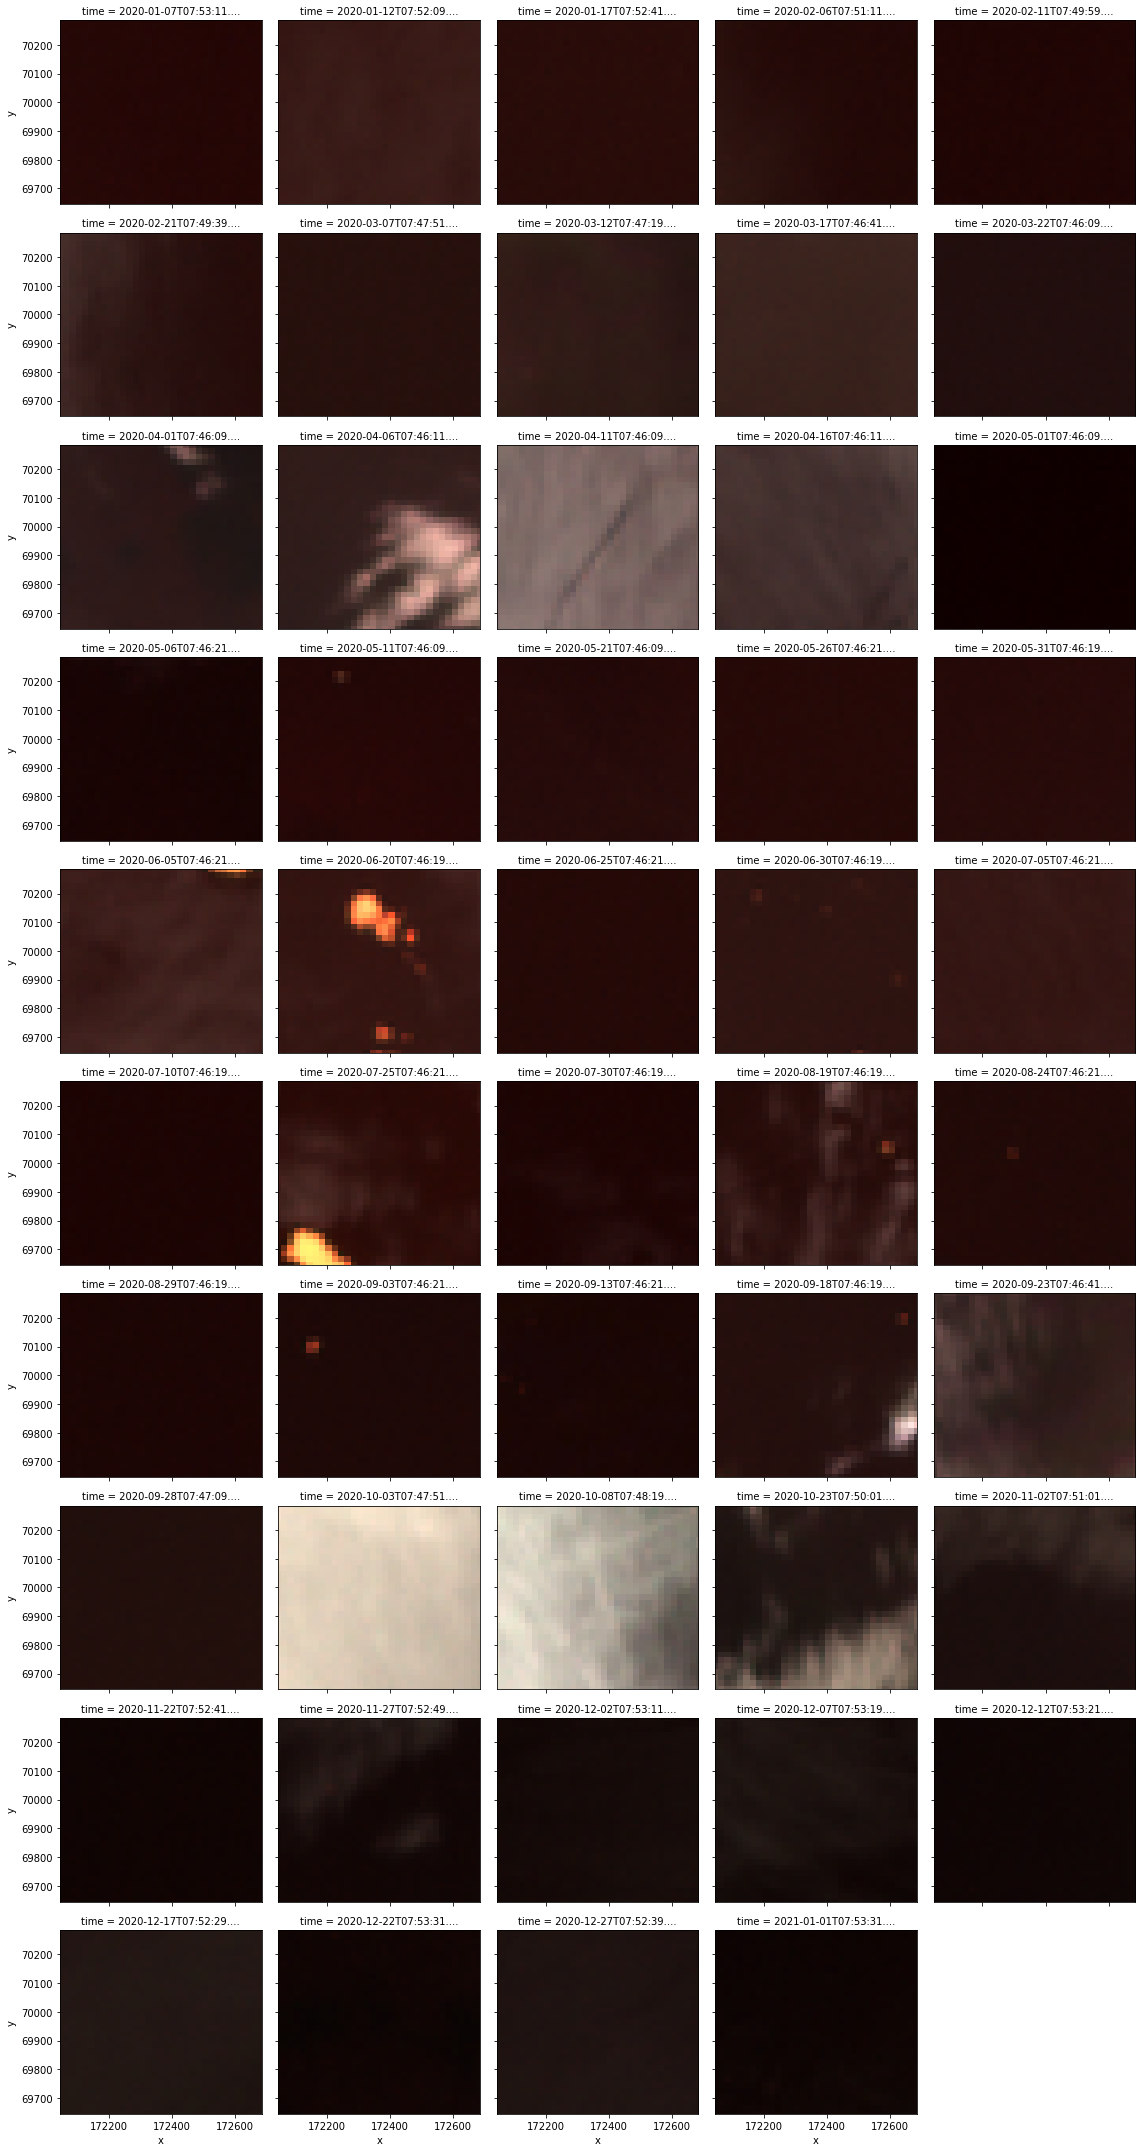

In [ ]:
(minicube.sel(band=["B8A","B11","B12"])/2000).clip(0,1).plot.imshow(col="time",col_wrap = 5)